In [280]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras

In [233]:
X_train = pd.read_pickle('./397/X_train_tf.pkl').astype(float)
y_train = pd.read_pickle('./397/y_train_tf.pkl').astype(float)
X_val = pd.read_pickle('./397/X_val_tf.pkl').astype(float)
y_val = pd.read_pickle('./397/y_val_tf.pkl').astype(float)
X_test = pd.read_pickle('./397/X_test_tf.pkl').astype(float)
y_test = pd.read_pickle('./397/y_test_tf.pkl').astype(float)

In [234]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#y_train_scaled = scaler.fit_transform(y_train)
X_val = scaler.fit_transform(X_val)
#y_val_scaled = scaler.fit_transform(y_val)
X_test = scaler.fit_transform(X_test)
#y_test_scaled = scaler.fit_transform(y_test)


In [222]:
# mean_vals = np.mean(X_train.values, axis=0)
# std_val = np.std(X_train.values)

# X_train = ((X_train - mean_vals) / std_val).to_numpy()
# X_val = ((X_train - mean_vals) / std_val).to_numpy()
# X_test = ((X_test - mean_vals) / std_val).to_numpy()

# y_train = ((y_train - mean_vals) / std_val).to_numpy()
# y_val = ((y_train - mean_vals) / std_val).to_numpy()
# y_test = ((y_test - mean_vals) / std_val).to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [144]:
# from sklearn.neural_network import MLPRegressor
# from sklearn.metrics import mean_squared_error

# reg = MLPRegressor(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='sgd', alpha=0.01, batch_size=32, max_iter=500, random_state=0, learning_rate_init=0.1)
# reg.fit(X_train_scaled, y_train)

# y_test_hat = reg.predict(X_test_scaled)
# #y_train_hat = scaler.inverse_transform(y_train_hat_scaled)
# #y_train_hat_scaled, y_train

# rmse = np.sqrt(np.mean(np.square(((y_test - y_test_hat) / y_test)), axis=0))
# print('RMSE : ', rmse)

In [161]:
198/2

99.0

In [300]:
def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true-y_pred)/y_true)))

In [331]:
#datasets = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train))
#datasets = datasets.batch(32)

model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.Dense(
        units=198,
        input_dim=X_train.shape[1],
        kernel_initializer='glorot_uniform',
        activation='ReLU'
    ))
model.add(
    tf.keras.layers.Dense(
        units=49,
        input_dim=198,
        kernel_initializer='glorot_uniform',
        activation='ReLU'
    ))
model.add(
    tf.keras.layers.Dense(
        units=1,
        input_dim=49,
        kernel_initializer='glorot_uniform',
))
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=rmspe)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 198)               78804     
_________________________________________________________________
dense_89 (Dense)             (None, 49)                9751      
_________________________________________________________________
dense_90 (Dense)             (None, 1)                 50        
Total params: 88,605
Trainable params: 88,605
Non-trainable params: 0
_________________________________________________________________


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1/1000
300/300 [==============================] - 4s 12ms/step - loss: 1.6527e-06 - mae: 8.4517e-04 - val_loss: 3.4746e-06 - val_mae: 0.0013
Epoch 2/1000
300/300 [==============================] - 3s 11ms/step - loss: 1.6828e-06 - mae: 8.5231e-04 - val_loss: 1.6457e-06 - val_mae: 7.5505e-04
Epoch 3/1000
300/300 [==============================] - 3s 11ms/step - loss: 1.7774e-06 - mae: 8.7586e-04 - val_loss: 3.1748e-06 - val_mae: 9.8263e-04
Epoch 4/1000
300/300 [==============================] - 3s 11ms/step - loss: 2.0543e-06 - mae: 9.3747e-04 - val_loss: 2.4430e-06 - val_mae: 0.0011
Epoch 5/1000
300/300 [==============================] - 3s 11ms/step - loss: 1.8922e-06 - mae: 9.1364e-04 - val_loss: 4.8320e-06 - val_mae: 0.0015
Epoch 6/1000
300/300 [==============================] - 3s 11ms/step - loss: 1.8807e-06 - mae: 9.0198e-04 - val_loss: 1.8511e-06 - val_mae: 0.0010
Epoch 7/1000
300/300 [==============================] - 3s 11ms/step - loss: 1.7207e-06 - mae: 8.6500e-04 - va

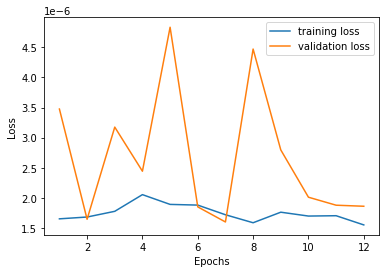

  5%|▌         | 1/20 [00:45<14:24, 45.49s/it]

Epoch 1/1000
300/300 [==============================] - 3s 11ms/step - loss: 1.6407e-06 - mae: 8.4205e-04 - val_loss: 1.8658e-06 - val_mae: 9.4395e-04
Epoch 2/1000
300/300 [==============================] - 3s 11ms/step - loss: 1.6031e-06 - mae: 8.3233e-04 - val_loss: 2.3996e-06 - val_mae: 0.0010
Epoch 3/1000
300/300 [==============================] - 3s 11ms/step - loss: 1.6434e-06 - mae: 8.4321e-04 - val_loss: 2.8061e-06 - val_mae: 0.0012
Epoch 4/1000
300/300 [==============================] - 3s 11ms/step - loss: 1.4963e-06 - mae: 7.9125e-04 - val_loss: 1.7950e-06 - val_mae: 8.4685e-04
Epoch 5/1000
300/300 [==============================] - 3s 11ms/step - loss: 1.5610e-06 - mae: 8.1522e-04 - val_loss: 3.2790e-06 - val_mae: 0.0011
Epoch 6/1000
300/300 [==============================] - 3s 11ms/step - loss: 1.5614e-06 - mae: 8.1645e-04 - val_loss: 1.3773e-06 - val_mae: 7.6806e-04
Epoch 7/1000
300/300 [==============================] - 3s 11ms/step - loss: 1.4620e-06 - mae: 7.8328e-04 

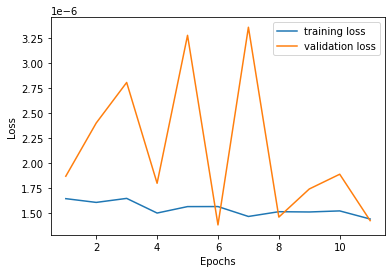

 10%|█         | 2/20 [01:27<13:00, 43.38s/it]

Epoch 1/1000
300/300 [==============================] - 3s 11ms/step - loss: 1.4518e-06 - mae: 7.7868e-04 - val_loss: 4.2175e-06 - val_mae: 0.0010
Epoch 2/1000
300/300 [==============================] - 3s 11ms/step - loss: 1.5523e-06 - mae: 8.1303e-04 - val_loss: 2.5299e-06 - val_mae: 9.7628e-04
Epoch 3/1000
300/300 [==============================] - 3s 11ms/step - loss: 1.5861e-06 - mae: 8.2637e-04 - val_loss: 1.5591e-06 - val_mae: 8.5497e-04
Epoch 4/1000
300/300 [==============================] - 3s 11ms/step - loss: 1.4401e-06 - mae: 7.7473e-04 - val_loss: 1.3472e-06 - val_mae: 7.3742e-04
Epoch 5/1000
300/300 [==============================] - 3s 11ms/step - loss: 1.3888e-06 - mae: 7.5625e-04 - val_loss: 1.3887e-06 - val_mae: 7.8394e-04
Epoch 6/1000
300/300 [==============================] - 3s 11ms/step - loss: 3.8242e-06 - mae: 0.0011 - val_loss: 8.7489e-06 - val_mae: 0.0020
Epoch 7/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7263e-06 - mae: 0.0020 - va

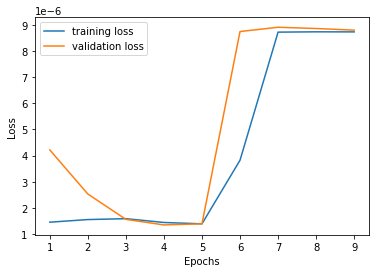

 15%|█▌        | 3/20 [02:01<11:07, 39.25s/it]

Epoch 1/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7445e-06 - mae: 0.0020 - val_loss: 9.6204e-06 - val_mae: 0.0019
Epoch 2/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7965e-06 - mae: 0.0020 - val_loss: 8.8266e-06 - val_mae: 0.0021
Epoch 3/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7367e-06 - mae: 0.0020 - val_loss: 8.7362e-06 - val_mae: 0.0021
Epoch 4/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7895e-06 - mae: 0.0020 - val_loss: 8.7273e-06 - val_mae: 0.0020
Epoch 5/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7651e-06 - mae: 0.0020 - val_loss: 8.7351e-06 - val_mae: 0.0021
Epoch 6/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7498e-06 - mae: 0.0020 - val_loss: 9.2621e-06 - val_mae: 0.0019
Epoch 7/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7844e-06 - mae: 0.0020 - val_loss: 8.8132e-06 - val_mae: 0.0021

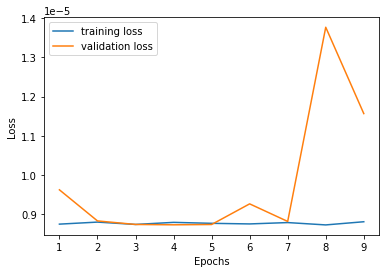

 20%|██        | 4/20 [02:35<09:56, 37.28s/it]

Epoch 1/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7800e-06 - mae: 0.0020 - val_loss: 9.0159e-06 - val_mae: 0.0019
Epoch 2/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.8047e-06 - mae: 0.0020 - val_loss: 9.1850e-06 - val_mae: 0.0019
Epoch 3/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7682e-06 - mae: 0.0020 - val_loss: 9.6834e-06 - val_mae: 0.0024
Epoch 4/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7310e-06 - mae: 0.0020 - val_loss: 8.9441e-06 - val_mae: 0.0019
Epoch 5/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7982e-06 - mae: 0.0020 - val_loss: 9.2734e-06 - val_mae: 0.0023
Epoch 6/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7601e-06 - mae: 0.0020 - val_loss: 9.2529e-06 - val_mae: 0.0023
Epoch 7/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.8172e-06 - mae: 0.0020 - val_loss: 1.0088e-05 - val_mae: 0.0019

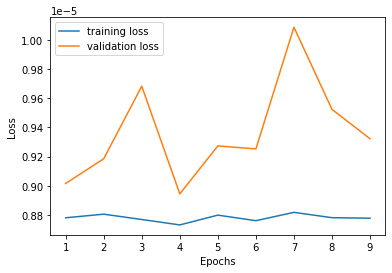

 25%|██▌       | 5/20 [03:10<09:02, 36.18s/it]

Epoch 1/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7322e-06 - mae: 0.0020 - val_loss: 8.7442e-06 - val_mae: 0.0020
Epoch 2/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7764e-06 - mae: 0.0020 - val_loss: 8.7489e-06 - val_mae: 0.0021
Epoch 3/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7506e-06 - mae: 0.0020 - val_loss: 8.9092e-06 - val_mae: 0.0019
Epoch 4/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7462e-06 - mae: 0.0020 - val_loss: 8.7889e-06 - val_mae: 0.0020
Epoch 5/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7668e-06 - mae: 0.0020 - val_loss: 8.7987e-06 - val_mae: 0.0021
Epoch 6/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7641e-06 - mae: 0.0020 - val_loss: 8.8409e-06 - val_mae: 0.0021


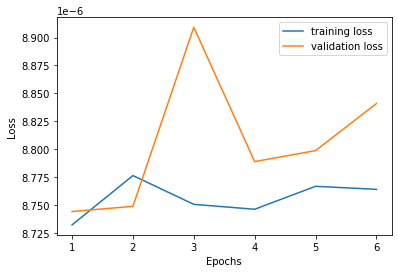

 30%|███       | 6/20 [03:34<07:31, 32.23s/it]

Epoch 1/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7349e-06 - mae: 0.0020 - val_loss: 8.7248e-06 - val_mae: 0.0020
Epoch 2/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7441e-06 - mae: 0.0020 - val_loss: 9.5746e-06 - val_mae: 0.0019
Epoch 3/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7782e-06 - mae: 0.0020 - val_loss: 8.8604e-06 - val_mae: 0.0021
Epoch 4/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7615e-06 - mae: 0.0020 - val_loss: 9.2297e-06 - val_mae: 0.0019
Epoch 5/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7773e-06 - mae: 0.0020 - val_loss: 9.3983e-06 - val_mae: 0.0019
Epoch 6/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7589e-06 - mae: 0.0020 - val_loss: 8.7545e-06 - val_mae: 0.0021


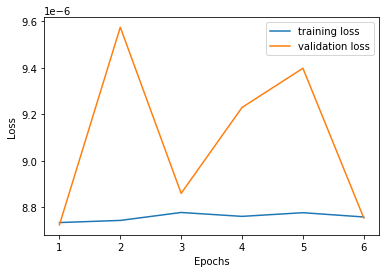

 35%|███▌      | 7/20 [03:59<06:26, 29.70s/it]

Epoch 1/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7766e-06 - mae: 0.0020 - val_loss: 8.7503e-06 - val_mae: 0.0021
Epoch 2/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7515e-06 - mae: 0.0020 - val_loss: 9.0614e-06 - val_mae: 0.0022
Epoch 3/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7696e-06 - mae: 0.0020 - val_loss: 8.9222e-06 - val_mae: 0.0022
Epoch 4/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7803e-06 - mae: 0.0020 - val_loss: 8.8752e-06 - val_mae: 0.0022
Epoch 5/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7610e-06 - mae: 0.0020 - val_loss: 9.1099e-06 - val_mae: 0.0019
Epoch 6/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7970e-06 - mae: 0.0020 - val_loss: 8.8445e-06 - val_mae: 0.0019


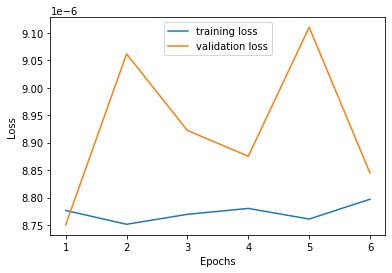

 40%|████      | 8/20 [04:24<05:38, 28.18s/it]

Epoch 1/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7727e-06 - mae: 0.0020 - val_loss: 8.8261e-06 - val_mae: 0.0021
Epoch 2/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7596e-06 - mae: 0.0020 - val_loss: 9.4634e-06 - val_mae: 0.0024
Epoch 3/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7526e-06 - mae: 0.0020 - val_loss: 8.7787e-06 - val_mae: 0.0020
Epoch 4/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7799e-06 - mae: 0.0020 - val_loss: 8.7998e-06 - val_mae: 0.0021
Epoch 5/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7399e-06 - mae: 0.0020 - val_loss: 9.3563e-06 - val_mae: 0.0023
Epoch 6/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7906e-06 - mae: 0.0020 - val_loss: 9.0080e-06 - val_mae: 0.0019
Epoch 7/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7462e-06 - mae: 0.0020 - val_loss: 8.9269e-06 - val_mae: 0.0022

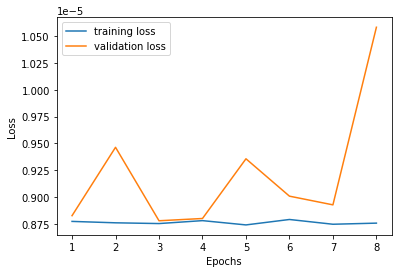

 45%|████▌     | 9/20 [04:55<05:20, 29.13s/it]

Epoch 1/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7539e-06 - mae: 0.0020 - val_loss: 8.7284e-06 - val_mae: 0.0020
Epoch 2/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7808e-06 - mae: 0.0020 - val_loss: 9.1482e-06 - val_mae: 0.0023
Epoch 3/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7854e-06 - mae: 0.0020 - val_loss: 8.9136e-06 - val_mae: 0.0019
Epoch 4/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.8032e-06 - mae: 0.0020 - val_loss: 8.9385e-06 - val_mae: 0.0022
Epoch 5/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7976e-06 - mae: 0.0020 - val_loss: 8.8343e-06 - val_mae: 0.0019
Epoch 6/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7767e-06 - mae: 0.0020 - val_loss: 8.7256e-06 - val_mae: 0.0020
Epoch 7/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7588e-06 - mae: 0.0020 - val_loss: 8.7827e-06 - val_mae: 0.0021

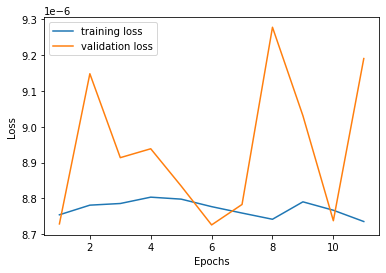

 50%|█████     | 10/20 [05:37<05:29, 32.99s/it]

Epoch 1/1000
300/300 [==============================] - 4s 12ms/step - loss: 8.7558e-06 - mae: 0.0020 - val_loss: 8.8065e-06 - val_mae: 0.0021
Epoch 2/1000
300/300 [==============================] - 3s 12ms/step - loss: 8.7459e-06 - mae: 0.0020 - val_loss: 9.5052e-06 - val_mae: 0.0024
Epoch 3/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.8001e-06 - mae: 0.0020 - val_loss: 8.7579e-06 - val_mae: 0.0020
Epoch 4/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7502e-06 - mae: 0.0020 - val_loss: 8.7735e-06 - val_mae: 0.0021
Epoch 5/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7402e-06 - mae: 0.0020 - val_loss: 8.8587e-06 - val_mae: 0.0021
Epoch 6/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7611e-06 - mae: 0.0020 - val_loss: 8.7800e-06 - val_mae: 0.0021
Epoch 7/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7508e-06 - mae: 0.0020 - val_loss: 8.7330e-06 - val_mae: 0.0020

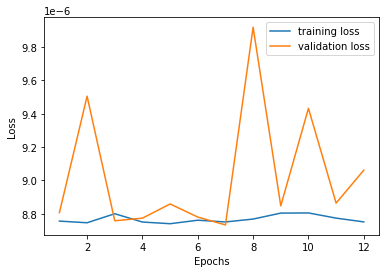

 55%|█████▌    | 11/20 [06:21<05:28, 36.49s/it]

Epoch 1/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7332e-06 - mae: 0.0020 - val_loss: 8.8847e-06 - val_mae: 0.0019
Epoch 2/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7794e-06 - mae: 0.0020 - val_loss: 9.2046e-06 - val_mae: 0.0019
Epoch 3/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7462e-06 - mae: 0.0020 - val_loss: 1.2434e-05 - val_mae: 0.0022
Epoch 4/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.8415e-06 - mae: 0.0020 - val_loss: 9.2289e-06 - val_mae: 0.0019
Epoch 5/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7394e-06 - mae: 0.0020 - val_loss: 9.2433e-06 - val_mae: 0.0019
Epoch 6/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7603e-06 - mae: 0.0020 - val_loss: 9.2708e-06 - val_mae: 0.0019


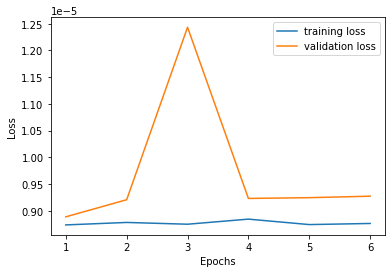

 60%|██████    | 12/20 [06:46<04:23, 32.95s/it]

Epoch 1/1000
300/300 [==============================] - 4s 12ms/step - loss: 8.7421e-06 - mae: 0.0020 - val_loss: 9.1384e-06 - val_mae: 0.0023
Epoch 2/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.8246e-06 - mae: 0.0020 - val_loss: 9.0418e-06 - val_mae: 0.0019
Epoch 3/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7551e-06 - mae: 0.0020 - val_loss: 9.0543e-06 - val_mae: 0.0019
Epoch 4/1000
300/300 [==============================] - 4s 14ms/step - loss: 8.8157e-06 - mae: 0.0020 - val_loss: 8.7738e-06 - val_mae: 0.0021
Epoch 5/1000
300/300 [==============================] - 3s 12ms/step - loss: 8.7570e-06 - mae: 0.0020 - val_loss: 8.9372e-06 - val_mae: 0.0022
Epoch 6/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7644e-06 - mae: 0.0020 - val_loss: 8.8127e-06 - val_mae: 0.0019
Epoch 7/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7490e-06 - mae: 0.0020 - val_loss: 8.9011e-06 - val_mae: 0.0022

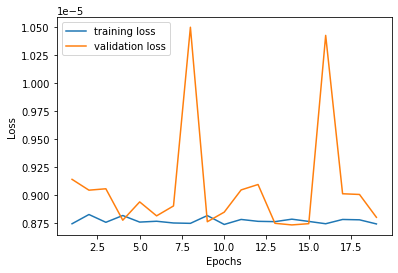

 65%|██████▌   | 13/20 [07:56<05:09, 44.27s/it]

Epoch 1/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7298e-06 - mae: 0.0020 - val_loss: 9.3701e-06 - val_mae: 0.0023
Epoch 2/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7975e-06 - mae: 0.0020 - val_loss: 9.1148e-06 - val_mae: 0.0023
Epoch 3/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7930e-06 - mae: 0.0020 - val_loss: 9.2266e-06 - val_mae: 0.0019
Epoch 4/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7708e-06 - mae: 0.0020 - val_loss: 8.8320e-06 - val_mae: 0.0021
Epoch 5/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7839e-06 - mae: 0.0020 - val_loss: 8.9107e-06 - val_mae: 0.0019
Epoch 6/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7600e-06 - mae: 0.0020 - val_loss: 8.7429e-06 - val_mae: 0.0021
Epoch 7/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7267e-06 - mae: 0.0020 - val_loss: 9.4360e-06 - val_mae: 0.0024

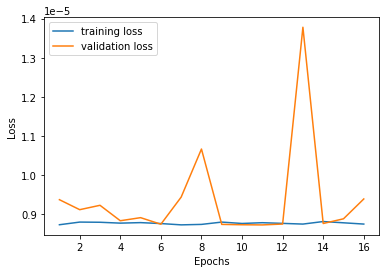

 70%|███████   | 14/20 [08:54<04:50, 48.42s/it]

Epoch 1/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7347e-06 - mae: 0.0020 - val_loss: 1.0105e-05 - val_mae: 0.0019
Epoch 2/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.8075e-06 - mae: 0.0020 - val_loss: 8.8342e-06 - val_mae: 0.0019
Epoch 3/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7804e-06 - mae: 0.0020 - val_loss: 8.7656e-06 - val_mae: 0.0021
Epoch 4/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7796e-06 - mae: 0.0020 - val_loss: 8.7711e-06 - val_mae: 0.0021
Epoch 5/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7452e-06 - mae: 0.0020 - val_loss: 8.8237e-06 - val_mae: 0.0021
Epoch 6/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7383e-06 - mae: 0.0020 - val_loss: 8.9114e-06 - val_mae: 0.0019
Epoch 7/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7578e-06 - mae: 0.0020 - val_loss: 8.7972e-06 - val_mae: 0.0021

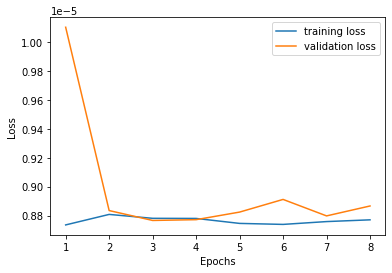

 75%|███████▌  | 15/20 [09:26<03:37, 43.51s/it]

Epoch 1/1000
300/300 [==============================] - 4s 12ms/step - loss: 8.7644e-06 - mae: 0.0020 - val_loss: 8.9134e-06 - val_mae: 0.0019
Epoch 2/1000
300/300 [==============================] - 4s 12ms/step - loss: 8.8115e-06 - mae: 0.0020 - val_loss: 8.9456e-06 - val_mae: 0.0019
Epoch 3/1000
300/300 [==============================] - 4s 13ms/step - loss: 8.7725e-06 - mae: 0.0020 - val_loss: 9.0807e-06 - val_mae: 0.0022
Epoch 4/1000
300/300 [==============================] - 4s 13ms/step - loss: 8.7769e-06 - mae: 0.0020 - val_loss: 8.7312e-06 - val_mae: 0.0020
Epoch 5/1000
300/300 [==============================] - 4s 14ms/step - loss: 8.7439e-06 - mae: 0.0020 - val_loss: 8.8009e-06 - val_mae: 0.0021
Epoch 6/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7637e-06 - mae: 0.0020 - val_loss: 9.1731e-06 - val_mae: 0.0023
Epoch 7/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7687e-06 - mae: 0.0020 - val_loss: 8.8011e-06 - val_mae: 0.0020

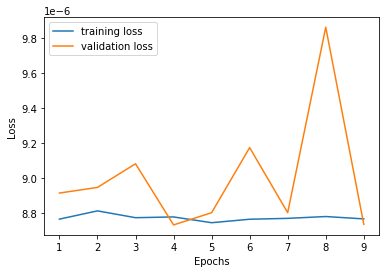

 80%|████████  | 16/20 [10:03<02:46, 41.56s/it]

Epoch 1/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7565e-06 - mae: 0.0020 - val_loss: 8.9777e-06 - val_mae: 0.0022
Epoch 2/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7647e-06 - mae: 0.0020 - val_loss: 9.1714e-06 - val_mae: 0.0019
Epoch 3/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7866e-06 - mae: 0.0020 - val_loss: 8.8728e-06 - val_mae: 0.0019
Epoch 4/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7751e-06 - mae: 0.0020 - val_loss: 8.8986e-06 - val_mae: 0.0019
Epoch 5/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7909e-06 - mae: 0.0020 - val_loss: 9.3053e-06 - val_mae: 0.0019
Epoch 6/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7767e-06 - mae: 0.0020 - val_loss: 9.0533e-06 - val_mae: 0.0019
Epoch 7/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7391e-06 - mae: 0.0020 - val_loss: 8.7406e-06 - val_mae: 0.0021

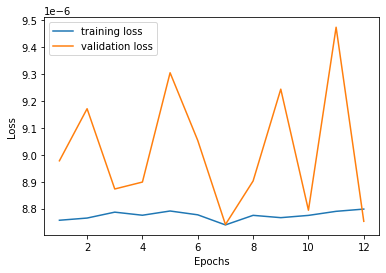

 85%|████████▌ | 17/20 [10:47<02:06, 42.30s/it]

Epoch 1/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7411e-06 - mae: 0.0020 - val_loss: 8.8705e-06 - val_mae: 0.0022
Epoch 2/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7346e-06 - mae: 0.0020 - val_loss: 9.1415e-06 - val_mae: 0.0023
Epoch 3/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7952e-06 - mae: 0.0020 - val_loss: 8.8657e-06 - val_mae: 0.0019
Epoch 4/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7502e-06 - mae: 0.0020 - val_loss: 9.9318e-06 - val_mae: 0.0025
Epoch 5/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7737e-06 - mae: 0.0020 - val_loss: 8.7963e-06 - val_mae: 0.0020
Epoch 6/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7938e-06 - mae: 0.0020 - val_loss: 8.8446e-06 - val_mae: 0.0019
Epoch 7/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7798e-06 - mae: 0.0020 - val_loss: 8.7296e-06 - val_mae: 0.0020

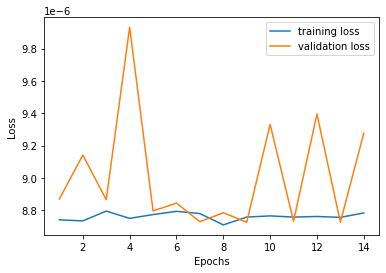

 90%|█████████ | 18/20 [11:38<01:29, 44.83s/it]

Epoch 1/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7946e-06 - mae: 0.0020 - val_loss: 8.8537e-06 - val_mae: 0.0019
Epoch 2/1000
300/300 [==============================] - 4s 12ms/step - loss: 8.7666e-06 - mae: 0.0020 - val_loss: 9.0165e-06 - val_mae: 0.0019
Epoch 3/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7970e-06 - mae: 0.0020 - val_loss: 1.0982e-05 - val_mae: 0.0027
Epoch 4/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7613e-06 - mae: 0.0020 - val_loss: 8.8702e-06 - val_mae: 0.0019
Epoch 5/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7576e-06 - mae: 0.0020 - val_loss: 9.2306e-06 - val_mae: 0.0019
Epoch 6/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7399e-06 - mae: 0.0020 - val_loss: 8.9956e-06 - val_mae: 0.0019


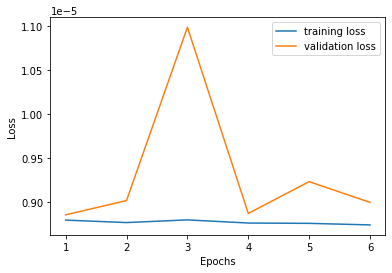

 95%|█████████▌| 19/20 [12:03<00:38, 38.90s/it]

Epoch 1/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7664e-06 - mae: 0.0020 - val_loss: 8.7985e-06 - val_mae: 0.0020
Epoch 2/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7792e-06 - mae: 0.0020 - val_loss: 9.3708e-06 - val_mae: 0.0023
Epoch 3/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7365e-06 - mae: 0.0020 - val_loss: 8.7577e-06 - val_mae: 0.0021
Epoch 4/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7737e-06 - mae: 0.0020 - val_loss: 1.0407e-05 - val_mae: 0.0026
Epoch 5/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7864e-06 - mae: 0.0020 - val_loss: 8.9750e-06 - val_mae: 0.0019
Epoch 6/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7541e-06 - mae: 0.0020 - val_loss: 9.1425e-06 - val_mae: 0.0023
Epoch 7/1000
300/300 [==============================] - 3s 11ms/step - loss: 8.7577e-06 - mae: 0.0020 - val_loss: 8.7256e-06 - val_mae: 0.0020

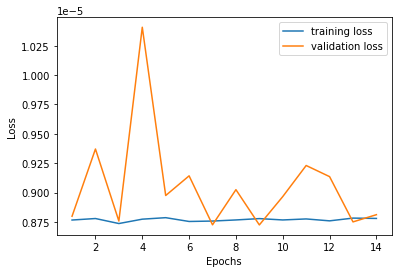

100%|██████████| 20/20 [12:54<00:00, 38.73s/it]


In [178]:
rmse = []
prediction_result = []

for num_iter in tqdm(range(0, 20)):

    call1 = tf.keras.callbacks.ModelCheckpoint(filepath=f'my_call_{num_iter}.hdf5', monitor='val_loss', save_best_only=True )
    call2 = tf.keras.callbacks.EarlyStopping(patience=5)
    callback_list = [call1, call2]

    history = model.fit(X_train, y_train,
                    batch_size=1000, epochs=1000, verbose=1,
                    validation_data=(X_val, y_val), callbacks=callback_list
    )

    epochs=np.arange(1, len(history.history['loss'])+1)
    plt.plot(epochs, history.history['loss'], label='training loss')
    plt.plot(epochs, history.history['val_loss'], label='validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    a = np.array([]).reshape(0, 1)

    for x in range (1, 42):
        length = int((X_test.shape[0] / 41))
        test = X_test[length*(x-1):length*(x)]

        y_hat = model.predict(test)
        #print(y_hat)
        a = np.append(a, y_hat)

    prediction_result.append(a)

    result = np.sqrt(np.mean(np.square(((a - y_test) / y_test)), axis=0))

    rmse.append(result)

        

In [179]:
rmse

[0.40894130512331256,
 0.34359534728953045,
 1.2185415907216295,
 0.5780098154957625,
 1.4261833020511068,
 1.2443421637925354,
 1.1750772094092485,
 0.9699806812008305,
 1.6806018438147838,
 0.8465269200217526,
 0.8830416134785412,
 0.8268728412072571,
 0.9977468123437827,
 0.801036927077549,
 0.9586908845103308,
 1.0655223037571977,
 1.0393302561190607,
 1.4132109955915209,
 0.9048025571371898,
 0.989457708551779]

In [332]:
# call1 = tf.keras.callbacks.ModelCheckpoint(filepath='my_call.hdf5', monitor='val_loss', save_best_only=True, mode='auto')
# call2 = tf.keras.callbacks.EarlyStopping(patience=2)
# callback_list = [call1, call2]

rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_delta=1e-5, verbose=1)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=11, restore_best_weights=True, verbose=1)
callback_list = [rlr, es]
history = model.fit(X_train, y_train,
                    batch_size=500, epochs=1000, verbose=1,
                    validation_data=(X_val, y_val), callbacks=callback_list
)

Epoch 1/1000
  1/599 [..............................] - ETA: 4:22 - loss: 194.0251

2022-10-24 00:10:15.681606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


598/599 [============================>.] - ETA: 0s - loss: 11.2592

2022-10-24 00:10:20.852958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


599/599 [==============================] - 6s 9ms/step - loss: 11.2574 - val_loss: 0.4623
Epoch 2/1000
599/599 [==============================] - 5s 8ms/step - loss: 0.3566 - val_loss: 0.3384
Epoch 3/1000
599/599 [==============================] - 5s 9ms/step - loss: 0.3132 - val_loss: 0.2964
Epoch 4/1000
599/599 [==============================] - 5s 9ms/step - loss: 0.2976 - val_loss: 0.2954
Epoch 5/1000
599/599 [==============================] - 5s 9ms/step - loss: 0.2829 - val_loss: 0.2970
Epoch 6/1000
599/599 [==============================] - 5s 9ms/step - loss: 0.2747 - val_loss: 0.2768
Epoch 7/1000
599/599 [==============================] - 5s 9ms/step - loss: 0.2669 - val_loss: 0.2570
Epoch 8/1000
599/599 [==============================] - 6s 10ms/step - loss: 0.2709 - val_loss: 0.2561
Epoch 9/1000
599/599 [==============================] - 6s 10ms/step - loss: 0.2883 - val_loss: 0.4098
Epoch 10/1000
599/599 [==============================] - 6s 10ms/step - loss: 0.2709 - val_l

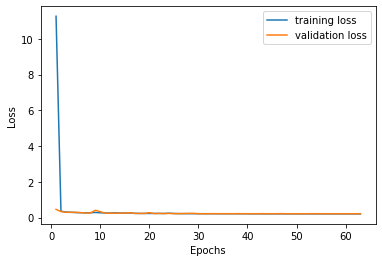

2022-10-24 00:15:39.993276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


RMSE : 0.22070610497136148


In [333]:

epochs=np.arange(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'], label='training loss')
plt.plot(epochs, history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

a = np.array([]).reshape(0, 1)

for x in range (1, 42):
    length = int((X_test.shape[0] / 41))
    test = X_test[length*(x-1):length*(x)]
    
    y_hat = model.predict(test)
    #print(y_hat)
    a = np.append(a, y_hat)

rmse = np.sqrt(np.mean(np.square(((a - y_test) / y_test)), axis=0))
print('RMSE :', rmse)
    

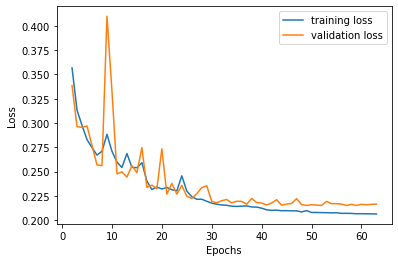

In [334]:
import matplotlib.pyplot as plt
import pandas as pd
epochs=np.arange(2, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'][1:], label='training loss')
plt.plot(epochs, history.history['val_loss'][1:], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [154]:
from sklearn.metrics import mean_squared_error

y_test_hat = reg.predict(X_test_scaled)
#y_train_hat = scaler.inverse_transform(y_train_hat_scaled)
#y_train_hat_scaled, y_train

rmse = np.sqrt(np.mean(np.square(((y_test_hat - y_test) / y_test)), axis=0))
print('RMSE : ', rmse)

NameError: name 'reg' is not defined

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train.shape))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
from xgboost import XGBRegressor
from imblearn.pipeline import Pipeline

model = Pipeline([ ('xgb', XGBRegressor( booster='gblinear'))])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

model = LogisticRegression()
rfecv = RFECV(model, cv=10)
rfecvfit = rfecv.fit(X_train, y_train)

rfecvfit_selected_values = X_train.columns[rfecvfit.get_support()]
print(rfecvfit_selected_values, len(rfecvfit_selected_values), sep='\n')

X_train_rfecvfit = X_train[:, rfecvfit.get_support()]

print(X_train_rfecvfit.shape)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

RUS = RandomUnderSampler(sampling_strategy=0.1)

UX, Uy = RUS.fit_resample(X_train, y_train)

print(UX.shape, Uy.shape, Uy.value_counts(), sep='\n')